In [2]:
import pandas as pd
import numpy as np

gen_study = pd.read_excel("https://github.com/rafabenevente/Relatives/blob/main/gen_study.xlsx?raw=true")

In [3]:
df = gen_study.T
df.drop(df.columns[0], axis=1, inplace=True)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
print(df.shape)
df.head() # check the df

(48, 65214)


Unnamed: 0,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
H223,0,1216,189,74,31895,2,763,8963,1589,8,...,0,0,0,0,0,0,0,0,0,0
H224,0,1228,114,38,23361,3,712,26794,1734,11,...,0,0,0,0,0,0,0,0,0,0
H225,0,1022,110,55,27944,0,956,8027,1341,9,...,0,0,0,0,0,0,0,0,0,0
H226,0,912,289,127,41846,6,1104,716,1053,22,...,0,0,0,0,0,0,0,0,0,0
H227,0,491,186,30,11929,14,136,745,730,11,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Save for later use
indexes = df.index

In [5]:
# convert all columns to numeric
df = df.apply(pd.to_numeric)

In [6]:
# check datatypes
from IPython.core.display import display
display(df.dtypes)

Unnamed: 0
ENSG00000000005    int64
ENSG00000000419    int64
ENSG00000000457    int64
ENSG00000000460    int64
ENSG00000000938    int64
                   ...  
ENSG00000281918    int64
ENSG00000281919    int64
ENSG00000281920    int64
ENSG00000281921    int64
ENSG00000281922    int64
Length: 65214, dtype: object

In [7]:
print(f"Min value in dataframe: {np.min(df.to_numpy())}")
print(f"Max value in dataframe: {np.max(df.to_numpy())}")

Min value in dataframe: 0
Max value in dataframe: 944074


In [8]:
# Check for duplicated rows
df.duplicated().sum()

0

In [9]:
# Removing columns with only one value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(col,axis=1)

# check dataframe shape
df.shape

(48, 44677)

In [10]:
# Check for null data in columns
df.isnull().sum(axis = 0)

Unnamed: 0
ENSG00000000005    0
ENSG00000000419    0
ENSG00000000457    0
ENSG00000000460    0
ENSG00000000938    0
                  ..
ENSG00000281904    0
ENSG00000281909    0
ENSG00000281912    0
ENSG00000281918    0
ENSG00000281920    0
Length: 44677, dtype: int64

In [11]:
# Check for null data in columns
df.isnull().sum(axis = 1)

H223    0
H224    0
H225    0
H226    0
H227    0
H228    0
H229    0
H230    0
H231    0
H232    0
H233    0
H234    0
H235    0
H236    0
H237    0
H238    0
H239    0
H240    0
H241    0
H242    0
H243    0
H244    0
H245    0
H246    0
H247    0
H248    0
H249    0
H250    0
H251    0
H252    0
H253    0
H254    0
H255    0
H256    0
H257    0
H258    0
H259    0
H260    0
H261    0
H262    0
H263    0
H264    0
H265    0
H266    0
H267    0
H268    0
H269    0
H270    0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Standardizing the features
df = StandardScaler().fit_transform(df)
print(f"Min value in dataframe: {np.min(df)}")
print(f"Max value in dataframe: {np.max(df)}")

Min value in dataframe: -2.7419202288276208
Max value in dataframe: 6.855654600401045


[2.04339380e-01 7.21039375e-02 4.21702488e-02 3.76996639e-02
 3.34946274e-02 3.18662374e-02 2.93339644e-02 2.52550488e-02
 2.42291998e-02 2.05980727e-02 1.95701190e-02 1.89534703e-02
 1.84409894e-02 1.78016098e-02 1.66910070e-02 1.62340401e-02
 1.60097481e-02 1.55014355e-02 1.52693589e-02 1.49629188e-02
 1.41880098e-02 1.40188865e-02 1.37117286e-02 1.36369206e-02
 1.34844556e-02 1.32332326e-02 1.29072603e-02 1.27631297e-02
 1.25144956e-02 1.22963000e-02 1.22411012e-02 1.20435904e-02
 1.18208301e-02 1.14879056e-02 1.13499286e-02 1.10734346e-02
 1.09412985e-02 1.05485910e-02 1.03083227e-02 1.01453778e-02
 9.94399449e-03 9.67460295e-03 9.36811971e-03 9.23105490e-03
 9.05817663e-03 8.91579655e-03 8.56837680e-03 1.73376361e-29]


Text(0.5, 1.0, 'Accumulated variance by components')

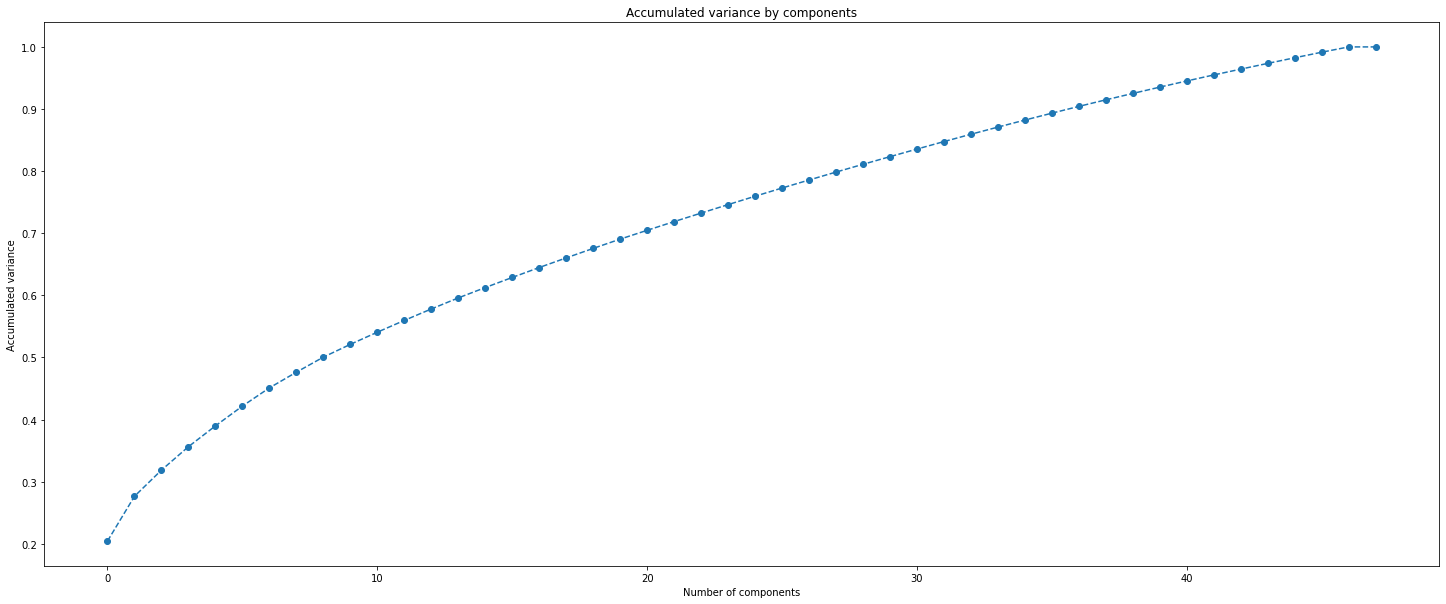

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
print(pca.explained_variance_ratio_)

plt.figure(figsize = (25,10))
plt.plot(range(df.shape[0]), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--')
plt.xlabel('Number of components')
plt.ylabel('Accumulated variance')
plt.title('Accumulated variance by components')

In [25]:
pca = PCA(0.75)
# 100% - 47 Components
# 75% - 25 Components
# 50% - 9 Components
# 25% - 2 Components
np_pca = pca.fit_transform(df)
print(np_pca.shape)

(48, 25)


In [26]:
df_pca = pd.DataFrame(data= np_pca, columns=["PC"+str(i) for i in range(np_pca.shape[1] )])
df_pca.index = indexes
df_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
H223,68.195396,86.751499,-70.668891,69.384746,-55.068531,-36.250057,4.871482,-17.007716,13.476000,54.803407,...,31.388289,15.595003,10.043756,-3.713434,3.272136,37.662803,-12.391559,-58.601307,59.560483,-34.299020
H224,43.359412,106.815725,-43.170183,19.607002,-47.524965,3.644159,48.404680,9.523104,24.644849,-5.525649,...,32.527836,-0.995725,6.200965,18.544573,25.659981,-42.213797,-52.954999,42.693760,-0.833595,46.318511
H225,27.179067,82.835109,-9.129869,20.254504,-57.545107,-19.833407,24.033153,-2.243335,-17.552042,-3.586604,...,48.518954,6.444499,-3.327292,-11.333439,3.602436,19.890535,-12.895100,-23.275718,-26.789300,-19.974927
H226,141.701480,-64.255470,-85.331769,41.170221,-39.658965,-66.870292,3.279608,7.018794,10.592044,-42.726899,...,2.576186,-53.551982,-16.754768,-62.742675,42.756008,-12.099150,8.067788,-23.222778,-9.251307,12.905719
H227,-92.459789,-38.536572,-42.267405,-13.769492,-27.230692,-30.765006,-6.790261,-6.358053,-5.067790,23.775030,...,-20.524204,1.188248,2.828017,11.388386,10.369140,14.431959,-8.916964,0.348418,34.092994,24.919375
H228,-96.234665,-29.812934,-52.738251,-65.725836,-43.879200,-9.699033,12.686824,-17.889652,17.713253,12.751587,...,-40.687006,-18.427262,-2.808485,9.570609,19.057514,-17.686015,20.018635,-4.484300,-8.041145,-17.259424
H229,-94.295358,-35.091207,-50.728376,-63.946268,-49.851276,-11.818621,-9.934986,-28.522855,-7.874381,4.831687,...,-19.416141,-19.157284,32.317713,15.267837,19.738661,-3.225357,61.965530,1.918269,-43.078628,37.722289
H230,94.817830,-59.114651,-36.109496,-6.547982,-33.795645,1.886844,72.611979,-3.352335,33.461945,-5.076865,...,-9.932277,52.280982,38.004074,-19.770947,-9.973528,20.936358,-20.427600,71.979165,-30.152337,-66.781661
H231,-71.445034,-32.199669,-23.082266,69.420658,3.432083,13.998282,-0.308742,0.286617,-9.207788,3.188707,...,-5.196682,16.020985,7.801568,23.755719,28.339483,-7.322662,-5.633245,-4.262863,26.210910,12.586933
H232,-110.403159,-31.400601,-6.742810,18.470705,-2.775360,9.741128,28.387657,12.004565,-23.881599,-11.426495,...,-15.832214,-9.983473,12.540125,-12.757364,14.984335,24.809061,1.395929,4.817368,8.178716,14.542923


In [29]:
import plotly.express as px
fig = px.scatter(df_pca, x="PC1", y="PC2", color=df_pca.index, template="plotly_dark")
fig.show()

In [32]:
var = pca.explained_variance_ratio_.sum()
fig = px.scatter_3d(df_pca, x="PC0", y="PC1", z="PC2", color=df_pca.index, labels={'0':'PC1', '1':'PC2', '2':'PC3'}, template="plotly_dark")
fig.show()

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
simi = cosine_similarity(np_pca, np_pca)

In [34]:
print(f"min: {np.min(simi)}")
print(f"max: {np.max(simi)}")

min: -0.5648680067668476
max: 1.0000000000000009


<AxesSubplot:>

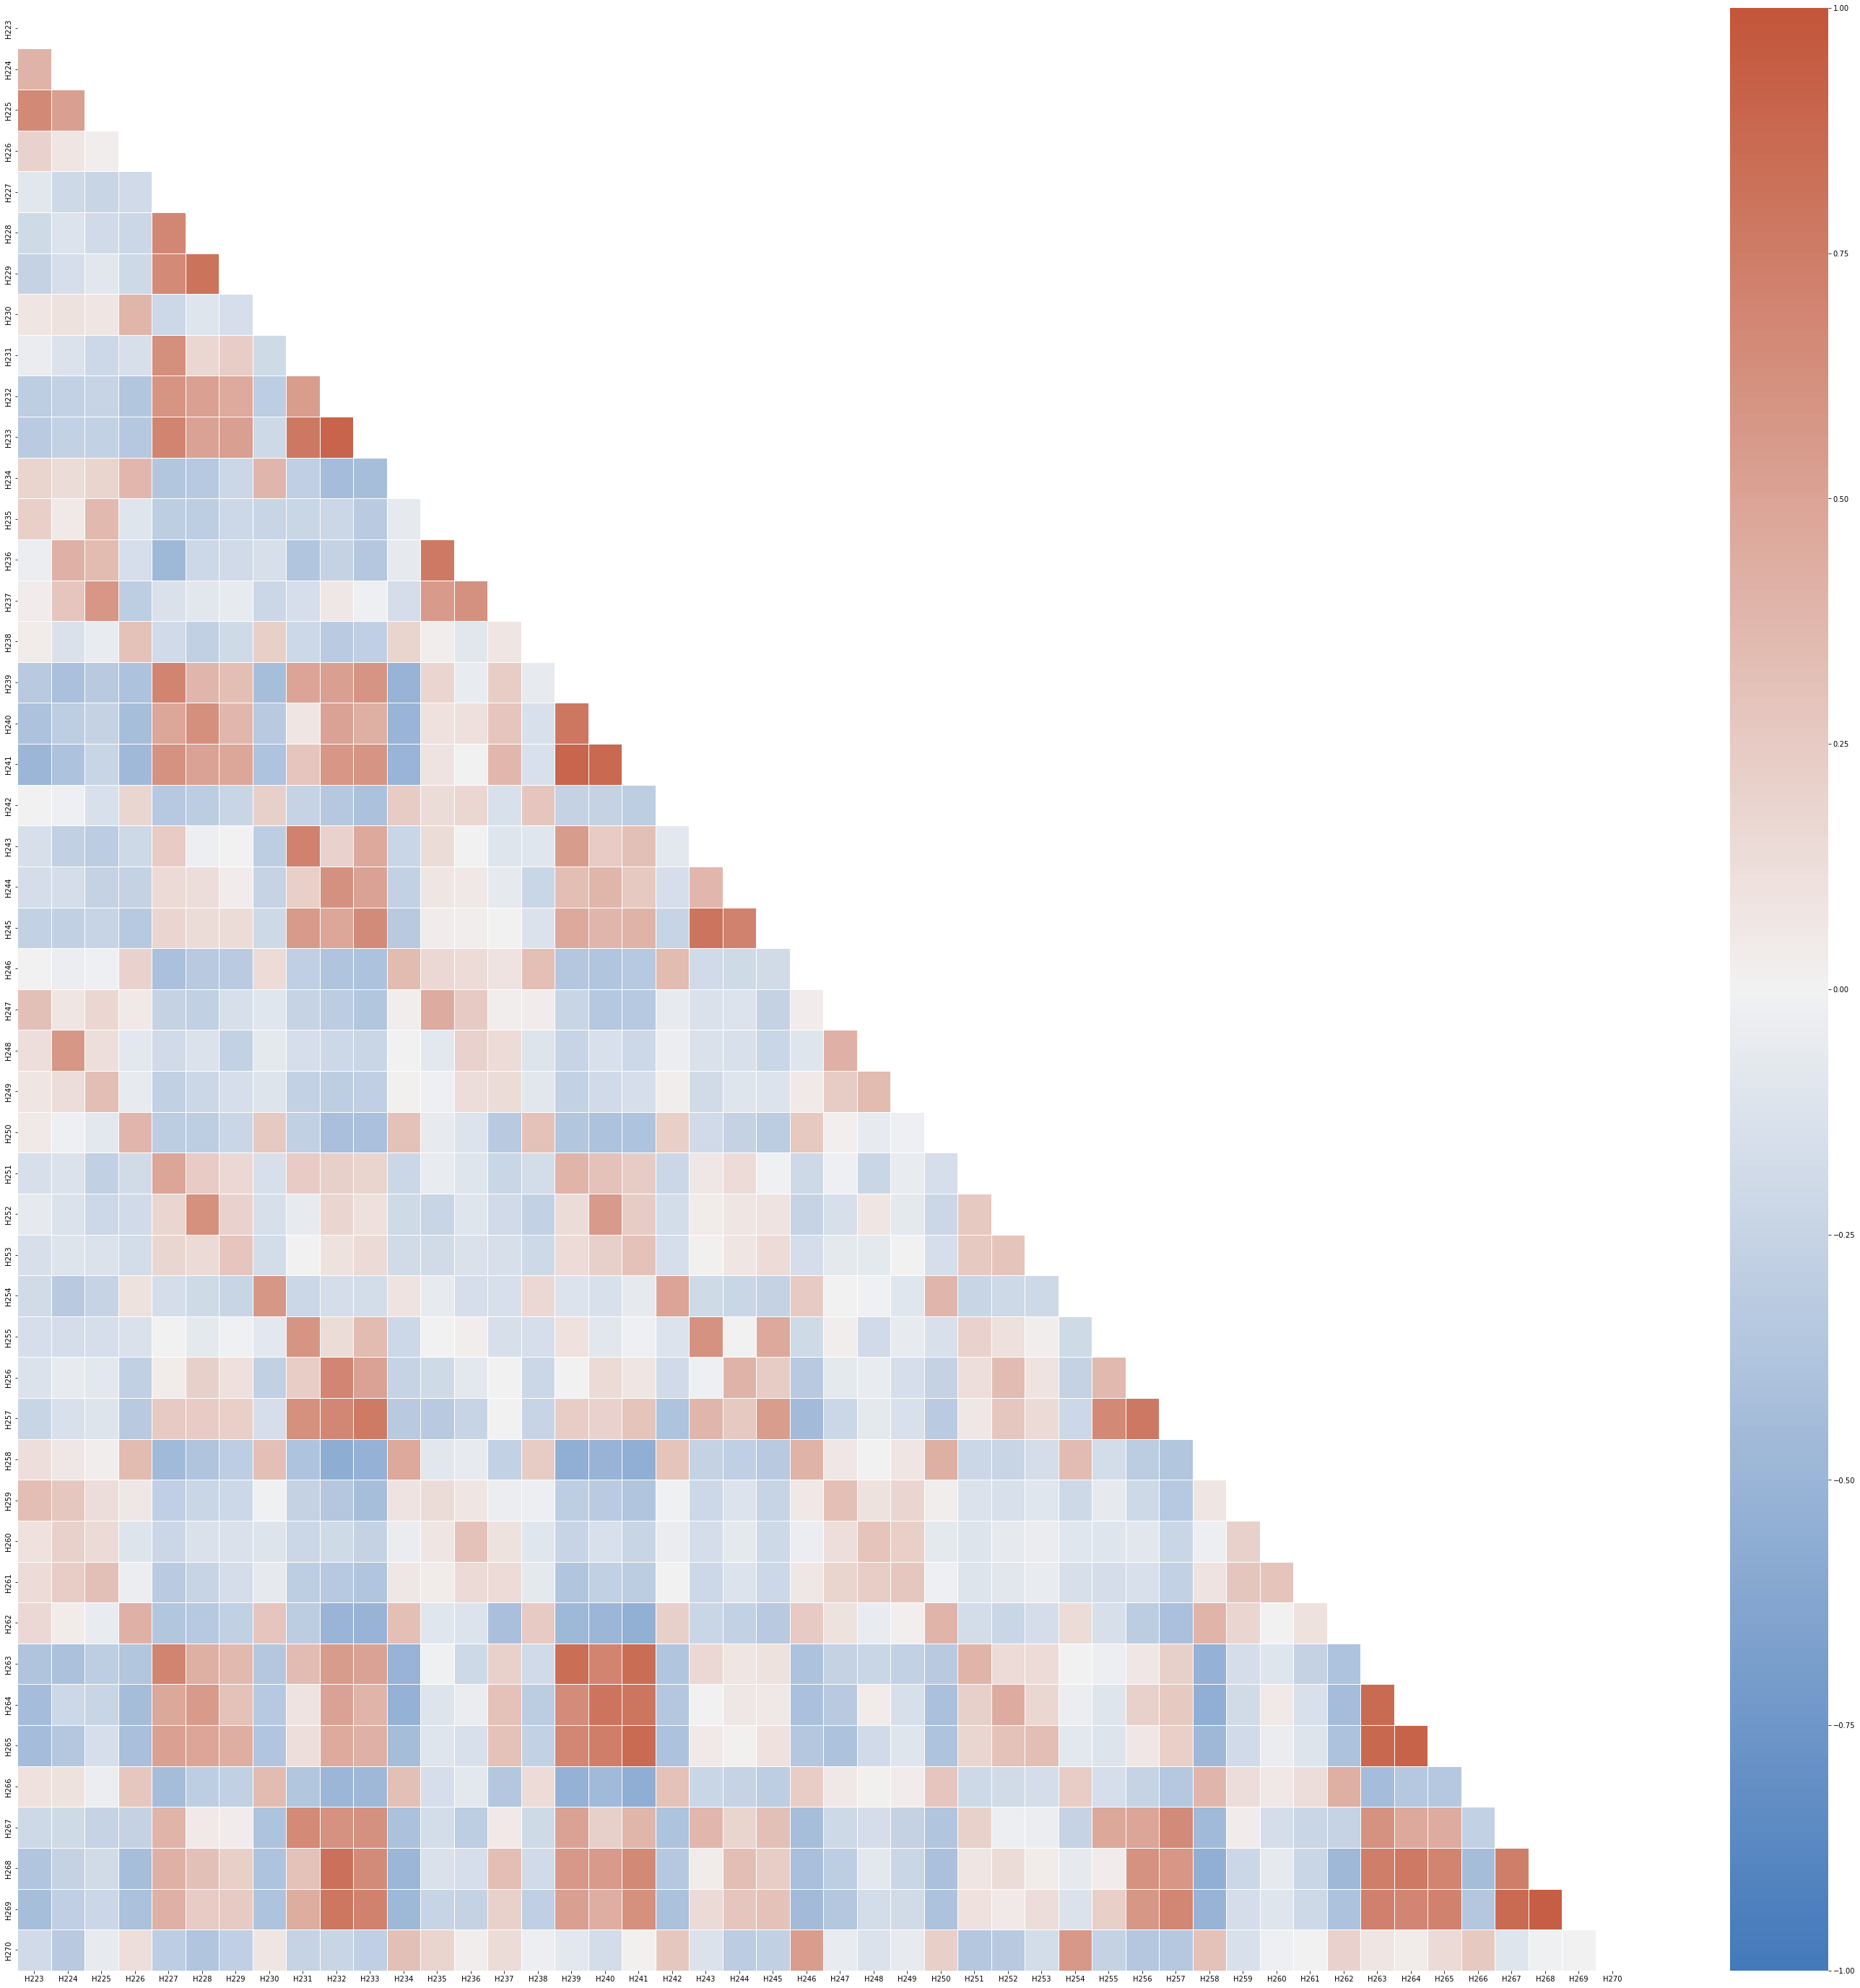

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(simi)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,50))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(simi, xticklabels=indexes, yticklabels=indexes, linewidths=.8, ax=ax, mask=mask, cmap=cmap, vmin=-1, vmax=1)

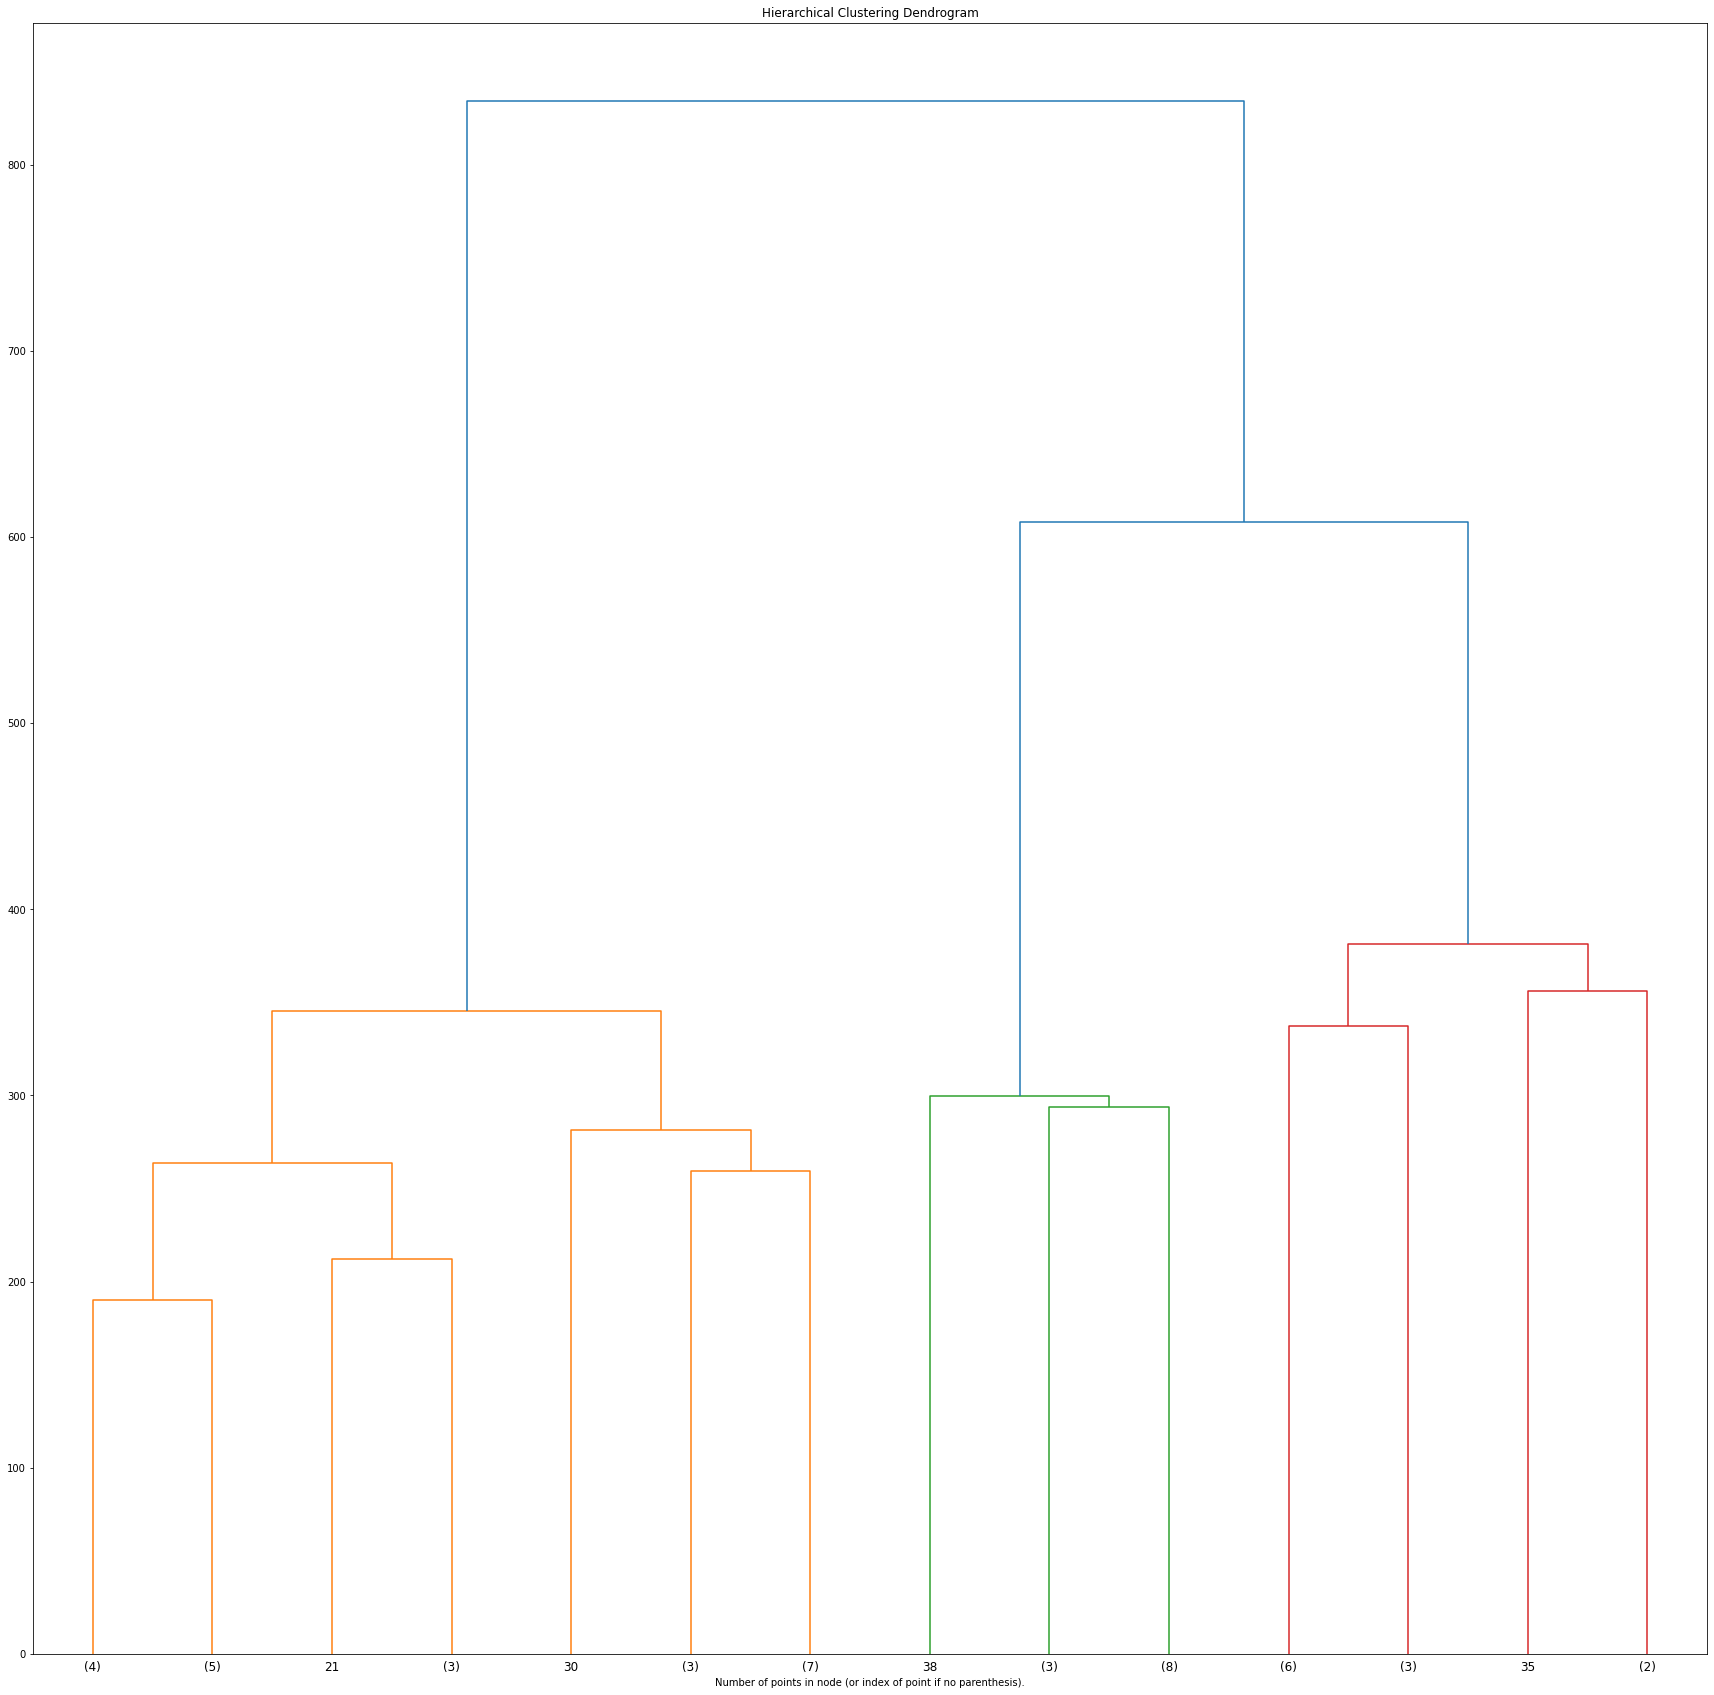

In [20]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

clustering = AgglomerativeClustering(affinity="euclidean", distance_threshold=0, n_clusters=None, linkage="ward")

clustering = clustering.fit(df_pca)
fig, ax = plt.subplots(figsize=(30,30))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [21]:
from sklearn.cluster import MeanShift

ms = MeanShift(bin_seeding=True, cluster_all=False)
ms.fit(np_pca)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique) - 1

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


In [22]:
labels

array([-1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  3,  0,  0, -1,  0,  0,  0,
        0,  1, -1, -1, -1,  2,  0,  0,  0, -1,  0,  0,  0,  0])

In [23]:
cluster_centers

array([[-5.22735277e+01, -1.40195618e+00,  3.47903981e+00,
         3.94152228e+00, -1.34932614e+00,  3.86885525e-02,
         3.65989639e+00,  2.98098276e+00,  5.64624648e-01,
         3.54656412e+00, -2.65004451e+00, -2.53619677e+00,
         1.19737553e+00, -4.31176191e+00, -1.06915853e+00,
         6.00650419e-02,  1.04420866e+00, -5.55537157e+00,
        -2.02637970e+00,  1.90554972e+00, -1.23689550e+00,
         1.57648276e+00,  1.91810016e+00, -1.47264902e+00,
         1.23811816e+00],
       [ 2.46624979e+02, -6.49304677e+01,  2.98463299e+01,
        -2.51171451e+01, -6.56511746e+01,  1.20295912e+02,
        -5.71636523e+01,  6.15374524e+01, -5.46825639e+01,
         9.19279565e+01, -2.94446344e+01, -2.35571301e+01,
        -5.31785850e+01, -1.74028308e+00,  1.73749559e+01,
         1.84106002e+01, -1.13551160e+01, -4.41219609e+00,
        -2.83431444e+00, -1.05191215e+01, -1.78598879e+00,
        -3.27805556e+00, -6.02912963e+00, -6.88288368e+00,
         1.26598249e+01],
    

Text(0.5, 1.0, 'Estimated number of clusters: 4')

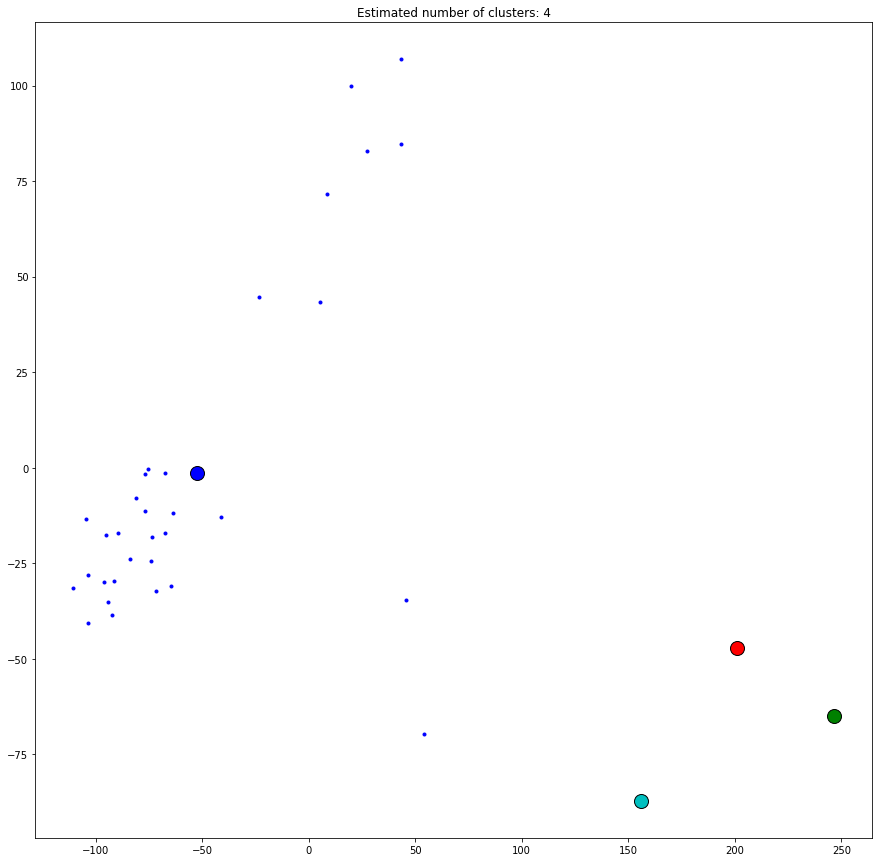

In [24]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(15,15))

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(np_pca[my_members, 0], np_pca[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()